#mediflt thershold figure

## DW(2016.01.05)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt
import gitInformation
from neo.io import NeuralynxIO

In [2]:
% matplotlib inline

In [3]:
gitInformation.printInformation()

Information about this notebook
Date: 2016-02-10
Python Version: 2.7.10 |Anaconda 2.3.0 (64-bit)| (default, May 28 2015, 16:44:52) [MSC v.1500 64 bit (AMD64)]
Git directory: C:\Users\Dominik\Documents\GitRep\kt-2015-DSPHandsOn\.git
Current git SHA: 7c691c39cb97d34d6abfa74c53307ea54a24ff99
Remotes: origin, 
Current branch: master
origin remote URL: https://github.com/dowa4213/kt-2015-DSPHandsOn.git


In [4]:
# Session folder with all needed neuralynx files
sessionfolder = 'C:\\Users\\Dominik\\Documents\\GitRep\\kt-2015-DSPHandsOn\\MedianFilter\\Python\\07. Real Data\\Figure'

In [5]:
# Loading the files with all datas and store them as a np.array
NIO = NeuralynxIO(sessiondir = sessionfolder, cachedir = sessionfolder)
block = NIO.read_block()
seg = block.segments[0]
analogsignal = seg.analogsignalarrays[0]

In [6]:
csc = analogsignal.magnitude

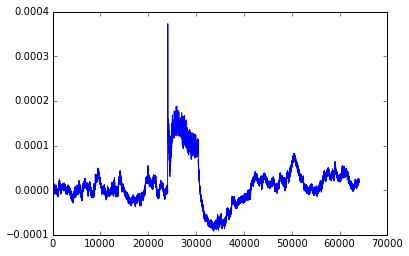

In [7]:
plt.plot(csc)
plt.savefig('realdata.png', dpi = 400)

Filter data with different window lenghts.

In [8]:
filtered1 = medfilt(csc,25)
new_data1 = csc-filtered1

In [9]:
filtered2 = medfilt(csc,35)
new_data2 = csc-filtered2

In [10]:
filtered3 = medfilt(csc,45)
new_data3 = csc-filtered3

In [11]:
filtered4 = medfilt(csc,55)
new_data4 = csc-filtered4

In [12]:
filtered5 = medfilt(csc,95)
new_data5 = csc-filtered5

Calculate the threshold for each filtered data

In [13]:
threshold1 = 4*np.median(abs(new_data1)/0.6745)
threshold2 = 4*np.median(abs(new_data2)/0.6745)
threshold3 = 4*np.median(abs(new_data3)/0.6745)
threshold4 = 4*np.median(abs(new_data4)/0.6745)
threshold5 = 4*np.median(abs(new_data5)/0.6745)
threshold6 = 4*np.median(abs(csc)/0.6745)

Plot Each data and the threshold

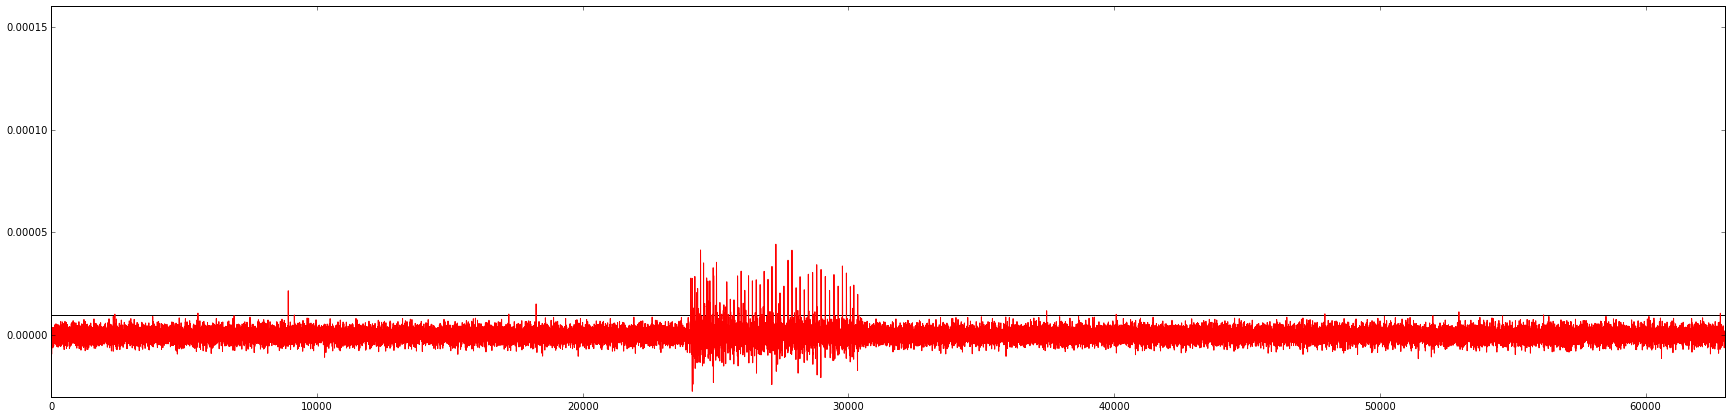

In [14]:
plt.figure(figsize=(30,7))
plt.axis([0, 63000, -0.00003, 0.00016])
plt.plot(new_data1, color = 'r')
plt.hlines(threshold1, 0, len(new_data1), color = 'black')
plt.savefig('Threshold.png', dpi = 400)

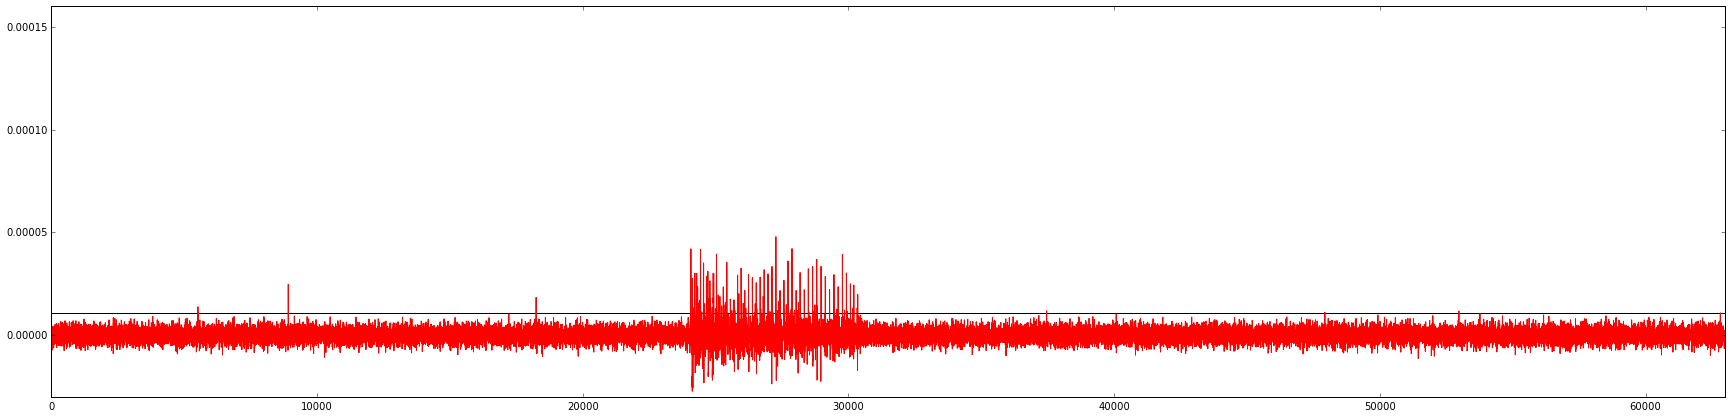

In [15]:
plt.figure(figsize=(30,7))
plt.axis([0, 63000, -0.00003, 0.00016])
plt.plot(new_data2, color = 'r')
plt.hlines(threshold2, 0, len(new_data1), color = 'black')
plt.savefig('ThresholdWL35.png', dpi = 400)

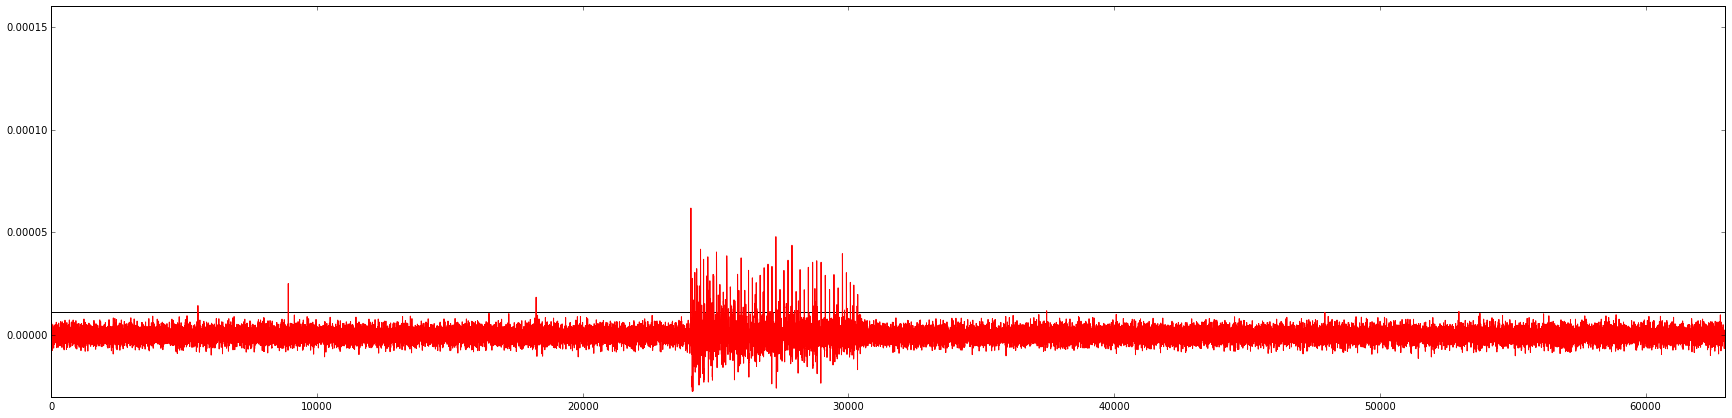

In [16]:
plt.figure(figsize=(30,7))
plt.axis([0, 63000, -0.00003, 0.00016])
plt.plot(new_data3, color = 'r')
plt.hlines(threshold3, 0, len(new_data1), color = 'black')
plt.savefig('ThresholdWL45.png', dpi = 400)

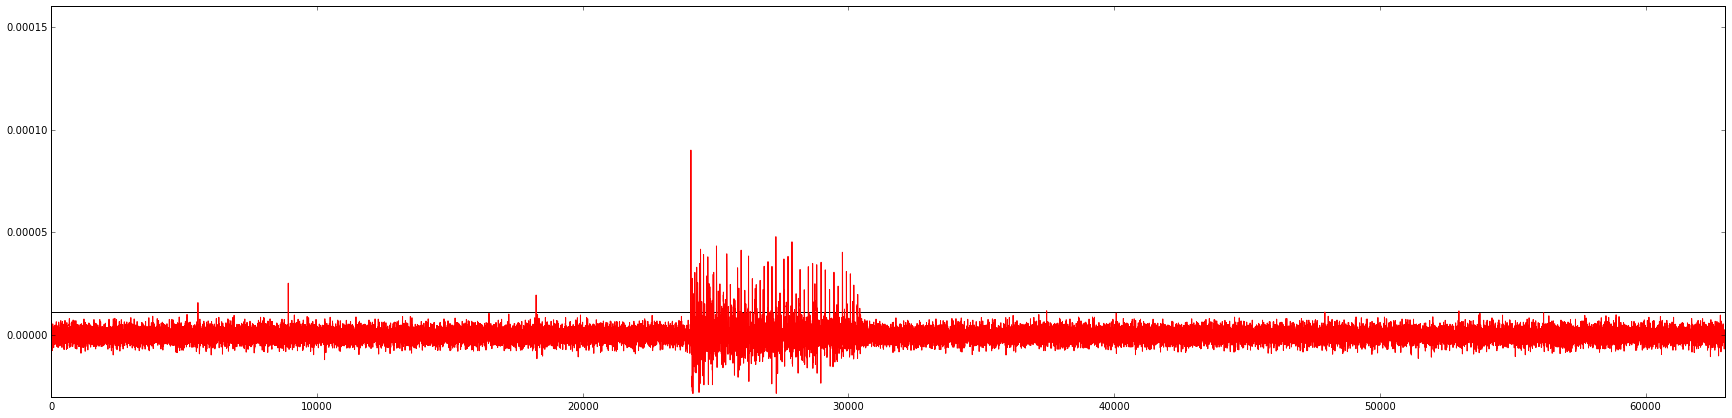

In [17]:
plt.figure(figsize=(30,7))
plt.axis([0, 63000, -0.00003, 0.00016])
plt.plot(new_data4, color = 'r')
plt.hlines(threshold4, 0, len(new_data1), color = 'black')
plt.savefig('ThresholdWL55.png', dpi = 400)

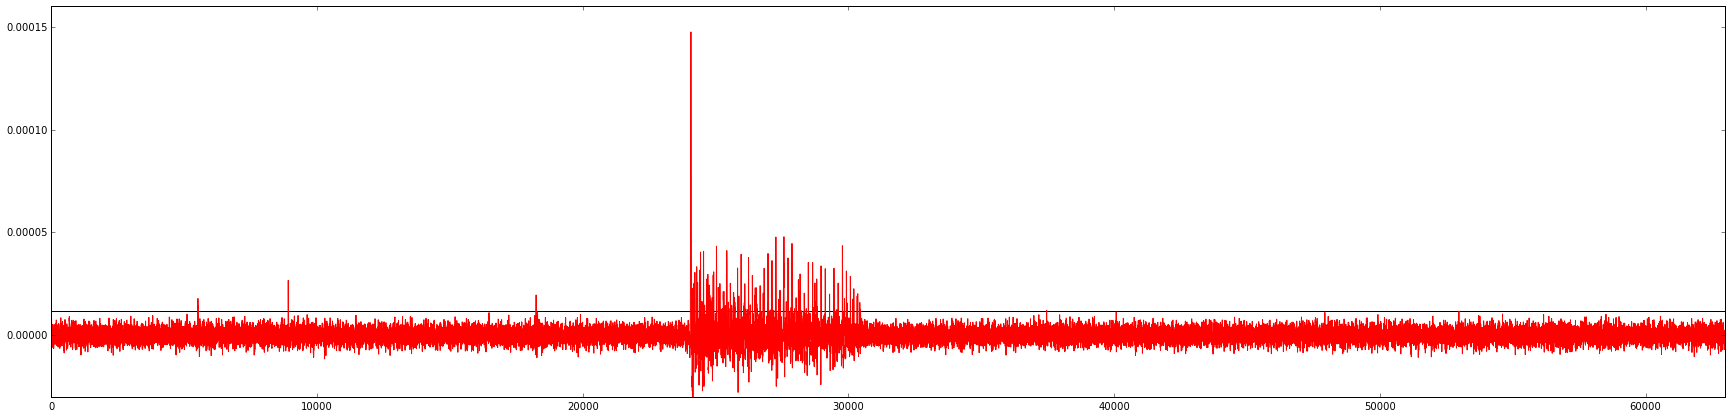

In [18]:
plt.figure(figsize=(30,7))
plt.axis([0, 63000, -0.00003, 0.00016])
plt.plot(new_data5, color = 'r')
plt.hlines(threshold5, 0, len(new_data1), color = 'black')
plt.savefig('ThresholdWL95.png', dpi = 400)

Iterate through all the datas and save alle shapes with a higher amplitude then the threshold 

In [19]:
def threshHold(new_data, threshold):
    count  = -1
    count2 = 0
    timer = 0
    # Dictionary with all thresholded shapes
    thresholds = {}
    # Get the value in the new_data array:
    for i in new_data:
        # Increment the counter (counter = position in the array)
        count += 1
        if i >= threshold:
            # check the thresholded window if some values are bigger then 0.00005
            temp = [i for i in new_data[count -6 : count + 18] if i >= 0.00005]
            # If no values are bigger then 0.00005 and the dead time is zero,
            # save the window in the dictionary 
            if len(temp) == 0 and timer == 0:
                # set the timer to 20, so 20 samples will be passed
                timer = 16
                # increment count2, for the array name
                count2 += 1
                thresholds["spike{0}".format(count2)] = new_data[count -6 : count + 18]
        elif timer > 0: 
            # Decrement the timer.
            timer -= 1
        else: 
            pass
    return thresholds

In [20]:
thresholds1 = threshHold(new_data1, threshold1)
thresholds2 = threshHold(new_data2, threshold2)
thresholds3 = threshHold(new_data3, threshold3)
thresholds4 = threshHold(new_data4, threshold4)
thresholds5 = threshHold(new_data5, threshold5)

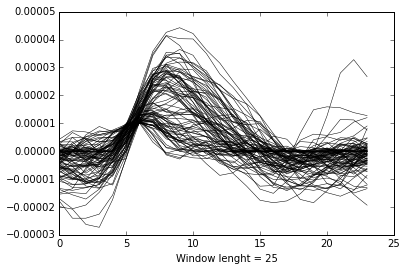

In [21]:
for i in thresholds1:
    plt.plot(thresholds1[i], color = 'black', linewidth = 0.5)
    plt.xlabel('Window lenght = 25')
    #plt.savefig('Wl25.png', dpi = 400)

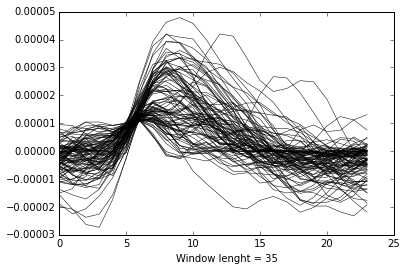

In [22]:
for i in thresholds2:
    plt.plot(thresholds2[i], color = 'black', linewidth = 0.5)
    plt.xlabel('Window lenght = 35')
    #plt.savefig('Wl35.png', dpi = 400)

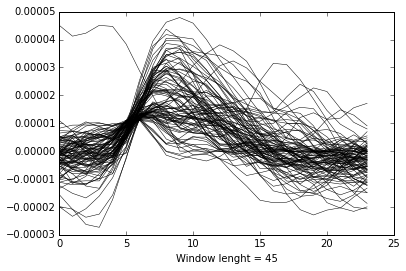

In [23]:
for i in thresholds3:
    plt.plot(thresholds3[i], color = 'black', linewidth = 0.5)
    plt.xlabel('Window lenght = 45')
    #plt.savefig('Wl45.png', dpi = 400)

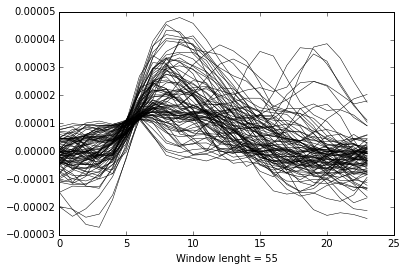

In [24]:
for i in thresholds4:
    plt.plot(thresholds4[i], color = 'black', linewidth = 0.5)
    plt.xlabel('Window lenght = 55')
    #plt.savefig('Wl55.png', dpi = 400)

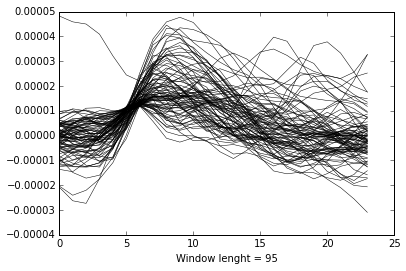

In [25]:
for i in thresholds5:
    plt.plot(thresholds5[i], color = 'black', linewidth = 0.5)
    plt.xlabel('Window lenght = 95')
    #plt.savefig('Wl95.png', dpi = 400)